# Retrieving Economic Points of Interest for Cap Haitien

## Inputs:

#### origins: derived from a WorldPoP raster using the 'Raster pixels to Points' tool in QGIS 3, and saved as a shapefile
#### destinations: The combination of POIs from Overpass as points and centroids of polygons called through the GOSTNets OSMNX_POIs library.
#### A bounding box will be used as an input


### Import libraries

In [25]:
import sys, os, inspect, logging, importlib

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.ops import split, unary_union
from shapely.geometry import box, Point

import matplotlib.pyplot as plt

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Get reference to OSMNX_POIs
sys.path.append(r'../../../GOST_PublicGoods/')
from Market_Access import OSMNX_POIs

In [27]:
# Get reference to GOSTNets
sys.path.append(r'C:\repos\GOSTnets')
import GOSTnets as gn

In [28]:
inputFolder = r'input_folder'
# define output folder
outputFolder = r'output_folder'

In [29]:
# import extent
city_extent = gpd.read_file("admin/cap_haitian_study_area.shp")

In [30]:
# make sure crs is 4326
print(city_extent.crs)

epsg:4326


In [31]:
extent = city_extent.geometry[0]

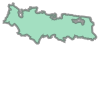

In [32]:
extent

In [33]:
#extent = box(*city_extent.total_bounds)

In [34]:
#extent

## We will extract OSM POIs

In [35]:
vitality_query = OSMNX_POIs.AmenityObject('vitality', extent, ["vending_machines","restaurant","fuel","fast_food","bank","theatre","car_wash","cafe","pharmacy","bar","pub","atm","social_facility","ice_cream","cinema"], inputFolder)        

In [36]:
vitality_query.GenerateOSMPOIs()

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\osmnx\pois.py:175: UserWarning: The `pois` module has been deprecated and will be removed in a future release. Use the `geometries` module's `geometries_from_polygon` function instead.
  warnings.warn(msg)
../../../GOST_PublicGoods\Market_Access\OSMNX_POIs.py:77: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['geometry'] = polygons.centroid
C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\geopandas\geoseries.py:158: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


,unique_id,osmid,element_type,addr:country,amenity,atm,operator,short_name,geometry,name,...,payment:notes,capacity,healthcare,nodes,contact:twitter,building_1,building:material,building:roof,condition,source:geometry
0,node/615050968,615050968,node,HT,bank,yes,Banque Nationale de Crédit,BNC,POINT (-72.19960 19.75875),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/1636671515,1636671515,node,NaN,fuel,NaN,NaN,NaN,POINT (-72.20192 19.75602),Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/1989631500,1989631500,node,NaN,restaurant,NaN,NaN,NaN,POINT (-72.19441 19.76763),Lakay Bar Restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/1990322369,1990322369,node,NaN,restaurant,NaN,NaN,NaN,POINT (-72.19390 19.76976),Deco Bar Restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/2150806809,2150806809,node,NaN,fuel,NaN,NaN,NaN,POINT (-72.21912 19.73973),Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,way/330242071,330242071,way,NaN,restaurant,NaN,NaN,NaN,POINT (-71.72831 19.55132),Shoun Bar & Grill,...,NaN,NaN,NaN,"[3371966826, 6169179193, 3371966830, 337196682...",NaN,NaN,NaN,NaN,NaN,NaN
456,way/337827562,337827562,way,NaN,fuel,NaN,NaN,NaN,POINT (-71.82606 19.63550),Station Saint Joseph de Fort Liberté,...,NaN,NaN,NaN,"[3448864608, 3448864614, 3448864612, 344886460...",NaN,NaN,NaN,NaN,NaN,NaN
457,way/381697541,381697541,way,NaN,bar,NaN,NaN,NaN,POINT (-72.01829 19.69209),NaN,...,NaN,NaN,NaN,"[2263086641, 2263086644, 2263086643, 226308664...",NaN,NaN,concrete,metal,fair,NaN
458,way/670536125,670536125,way,NaN,restaurant,NaN,NaN,NaN,POINT (-72.25573 19.71959),NaN,...,NaN,NaN,NaN,"[6279224868, 6279224869, 6279224870, 627922487...",NaN,NaN,NaN,NaN,NaN,esri


In [37]:
vitality_query.RemoveDupes(0.0001)

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../../../GOST_PublicGoods\Market_Access\OSMNX_POIs.py:93: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf['geometry'].buffer(buf_width)


,access,addr:city,addr:country,addr:full,addr:housenumber,addr:place,addr:postcode,addr:street,amenity,atm,...,social_facility,social_facility:for,source,source:geometry,source:project,stars,takeaway,tourism,unique_id,wheelchair
0,NaN,NaN,HT,NaN,NaN,NaN,NaN,NaN,bank,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/615050968,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fuel,NaN,...,NaN,NaN,survey,NaN,NaN,NaN,NaN,NaN,node/1636671515,NaN
2,NaN,Cap-Haitien,NaN,NaN,NaN,NaN,1110,Boulevard Carénage,restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/1989631500,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/1990322369,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fuel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node/2150806809,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pharmacy,NaN,...,NaN,NaN,survey,NaN,NaN,NaN,NaN,NaN,way/218526166,NaN
418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,social_facility,NaN,...,group_home,orphan,survey,NaN,NaN,NaN,NaN,NaN,way/225269472,NaN
419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fuel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way/337827562,NaN
420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant,NaN,...,NaN,NaN,survey,esri,NaN,NaN,NaN,NaN,way/670536125,NaN


In [38]:
# warning: might not want to include the 'osmid' field because it may contain lists
vitality_destinations = vitality_query.df[['amenity','geometry','name']]

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
vitality_destinations[:3]

,amenity,geometry,name
0,bank,POINT (-72.1996027 19.758745),NaN
1,fuel,POINT (-72.2019203 19.7560232),Total
2,restaurant,POINT (-72.19441260000001 19.7676253),Lakay Bar Restaurant


## Manually get shop POIs
For this using the OSMNX (version pre 1.0 release) pois_from_polygon function directly, because the market access amenity object can only query amenities. Then I am also including some code similar to what is inside the GenerateOSMPOIs() function that combines points, polygons, and relations together.

In [40]:
from shapely.ops import cascaded_union

df = ox.pois_from_polygon(polygon = extent, tags = {'shop':["convenience", "supermarket", "clothes", "hairdresser", "car_repair", "bakery", "beauty", "kiosk", "butcher", "hardware", "furniture", "mobile_phone", "florist", "electronics", "car_parts","shoes","mall","optician","jewelry","variety_store","department_store","books","travel_agency","laundry","confectionery","computer","beverages","deli"]} )

points = df.copy()
points = points.loc[points['element_type'] == 'node']

polygons = df.copy()
polygons = polygons.loc[polygons['element_type'] == 'way']
polygons['geometry'] = polygons.centroid

multipolys = df.copy()
multipolys = multipolys.loc[multipolys['element_type'] == 'relation']
multipolys['geometry'] = multipolys['geometry'].apply(lambda x: self.RelationtoPoint(x))

df = pd.concat([pd.DataFrame(points),pd.DataFrame(polygons),pd.DataFrame(multipolys)], ignore_index=True)

gdf = gpd.GeoDataFrame(df, geometry = 'geometry', crs = 'epsg:4326')              
gdf['buffer'] = gdf['geometry'].buffer(0.0001)        
l = pd.DataFrame()        
for i in gdf.index:            
    row = gdf.loc[i]            
    if len(l) == 0:
        l = l.append(row, ignore_index = True)            
    else:
        current_points = cascaded_union(l['buffer']) 
        if row['buffer'].intersects(current_points):
            pass                
        else:
            l = l.append(row, ignore_index = True) 
            
shop_destinations = l[['amenity','geometry','name']]

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\osmnx\pois.py:175: UserWarning: The `pois` module has been deprecated and will be removed in a future release. Use the `geometries` module's `geometries_from_polygon` function instead.
  warnings.warn(msg)
C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\war-machine\A

In [41]:
shop_destinations

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,amenity,geometry,name
0,NaN,POINT (-72.20152 19.7612877),Digicel
1,NaN,POINT (-72.19571329999999 19.7643181),Kokiyaj Market
2,NaN,POINT (-72.1968974 19.7624264),NaN
3,NaN,POINT (-72.208641 19.746061),Kaina Auto Parts
4,NaN,POINT (-72.2193407 19.7390243),NaN
...,...,...,...
900,NaN,POINT (-72.1985394 19.7589012),NaN
901,NaN,POINT (-72.0216884 19.6177301),NaN
902,NaN,POINT (-72.24652489137242 19.77258777400966),Colmado
903,NaN,POINT (-72.24444198313819 19.77213700366034),Colmado


## join amenities and shops

In [42]:
shop_and_amenity_destinations = pd.concat([shop_destinations, vitality_destinations], ignore_index=True)

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
shop_and_amenity_destinations

,amenity,geometry,name
0,NaN,POINT (-72.20152 19.7612877),Digicel
1,NaN,POINT (-72.19571329999999 19.7643181),Kokiyaj Market
2,NaN,POINT (-72.1968974 19.7624264),NaN
3,NaN,POINT (-72.208641 19.746061),Kaina Auto Parts
4,NaN,POINT (-72.2193407 19.7390243),NaN
...,...,...,...
1322,pharmacy,POINT (-72.22744650229551 19.72819894318306),NaN
1323,social_facility,POINT (-71.8310951 19.66322569999999),Orphelinat Martin- Lutter
1324,fuel,POINT (-71.82606255 19.63549695),Station Saint Joseph de Fort Liberté
1325,restaurant,POINT (-72.25573403096587 19.71959196596272),NaN


## save the facilities as a shapefile

In [44]:
# convert to GeoDataFrame
shop_and_amenity_destinations_gpd = gpd.GeoDataFrame(shop_and_amenity_destinations, crs = "epsg:4326", geometry = 'geometry')
shop_and_amenity_destinations_gpd.to_file(outputFolder + '/osm_infrastructure/osm_shops_and_amenities.shp')

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
